# SALES ANALYSIS OF ELECTRIC VEHICLES
EV sales prediction in the world using ML

**Aim:** To predict the sales of EV and its share in the transportation sector using ML by 2030

Team


1.   Sanjay R (23M0002)

1.   Saurabh Narayan Pawar (23M0003)
3.   Vanhar Ali Shaik (23M0007)

4.   Ranjith A V (23M0009)

TAs are requested to navigate the file **IEA-EV-data.csv**, which is submitted along the code file, to run the code.


In [ ]:
####################################################### Importing Libraries ##############################################

import numpy as np                # Importing the NumPy library and aliasing it as np
import pandas as pd               # Importing the Pandas library and aliasing it as pd
import matplotlib.pyplot as plt   # Importing the pyplot module from the Matplotlib library and aliasing it as plt
import seaborn as sns             # Importing the Seaborn library and aliasing it as sns
import geopandas as gpd           # Importing the Geopandas library and aliasing it as gpd
import plotly.express as px       # Importing the express module from the Plotly library and aliasing it as px
import plotly.graph_objects as go # Importing the graph_objects module from the Plotly library and aliasing it as go

# Magic command to display Matplotlib plots inline in the Jupyter Notebook or JupyterLab
%matplotlib inline

The data for the analysis is taken from Kaggle website - https://www.kaggle.com/datasets/aakashshakya/iea-ev-dataset-2023


In [ ]:
# Visualising data.
df = pd.read_csv("IEA-EV-data.csv")   # Reading a CSV file named "IEA-EV-data.csv" into a Pandas DataFrame and storing it in the variable df
df.head(50)                           # Displaying the first 3 rows of the DataFrame df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
5,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280
6,Australia,Historical,EV stock,Cars,BEV,2012,stock,220.00000
7,Australia,Historical,EV sales,Cars,PHEV,2012,sales,80.00000
8,Australia,Historical,EV sales,Cars,BEV,2012,sales,170.00000
9,Australia,Historical,EV stock,Cars,PHEV,2012,stock,80.00000


In [ ]:
df.shape   # Getting the dimensions of the DataFrame df (number of rows, number of columns)
df.info()  # Providing a concise summary of the DataFrame df, including the index dtype and column dtypes, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      6671 non-null   object 
 1   category    6671 non-null   object 
 2   parameter   6671 non-null   object 
 3   mode        6671 non-null   object 
 4   powertrain  6671 non-null   object 
 5   year        6671 non-null   int64  
 6   unit        6671 non-null   object 
 7   value       6671 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 417.1+ KB


In [ ]:
df.nunique()  # Counting the number of unique values in each column of the DataFrame df
df['unit'].unique()  # Getting an array of unique values in the 'unit' column of the DataFrame df

array(['sales', 'stock', 'percent', 'charging points',
       'Milion barrels per day', 'Milion litres gasoline equivalent',
       'GWh'], dtype=object)

In [ ]:
sales = df.loc[lambda df: df['unit'] == 'sales']   # Filtering rows in the DataFrame df where the 'unit' column has the value 'sales' and storing the result in the sales variable
sales.head(50)                                     # Displaying the first 50 rows of the filtered DataFrame sales

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.0
7,Australia,Historical,EV sales,Cars,PHEV,2012,sales,80.0
8,Australia,Historical,EV sales,Cars,BEV,2012,sales,170.0
11,Australia,Historical,EV sales,Cars,BEV,2013,sales,190.0
12,Australia,Historical,EV sales,Cars,PHEV,2013,sales,100.0
19,Australia,Historical,EV sales,Cars,PHEV,2014,sales,950.0
20,Australia,Historical,EV sales,Cars,BEV,2014,sales,370.0
23,Australia,Historical,EV sales,Cars,BEV,2015,sales,760.0
24,Australia,Historical,EV sales,Cars,PHEV,2015,sales,1000.0
31,Australia,Historical,EV sales,Cars,PHEV,2016,sales,700.0


In [ ]:
df['year'].unique()  # Getting an array of unique values in the 'year' column of the DataFrame df

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2010, 2025, 2030])

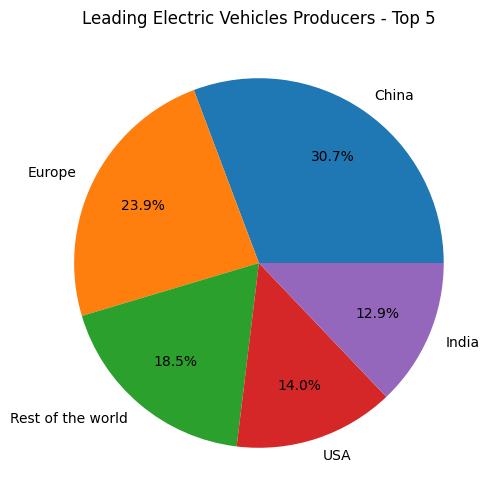

In [ ]:
fig = plt.figure(figsize=(6, 6))       # Creating a new figure with a specified size (width, height) in inches
ax = fig.subplots()                    # Creating subplots on the figure
df.region.value_counts().head(5).plot(ax=ax, kind='pie', autopct='%1.1f%%', pctdistance=0.7)  # Creating a pie chart showing the distribution of top 5 regions producing electric vehicles
ax.set_ylabel("")                      # Setting the y-axis label to an empty string
ax.set_title("Leading Electric Vehicles Producers - Top 5")  # Setting the title of the plot
plt.show()                             # Displaying the plot

# Result

Top leading EV producers according to kaggle data are as follows,
1.   China
2.   Europe
1.   USA
2.   India
5.   Rest of the world








## Prediction Data Analysis

### Sales trend and prediction

In [ ]:
sales['parameter'].unique()  # Getting an array of unique values in the 'parameter' column of the DataFrame sales

array(['EV sales'], dtype=object)

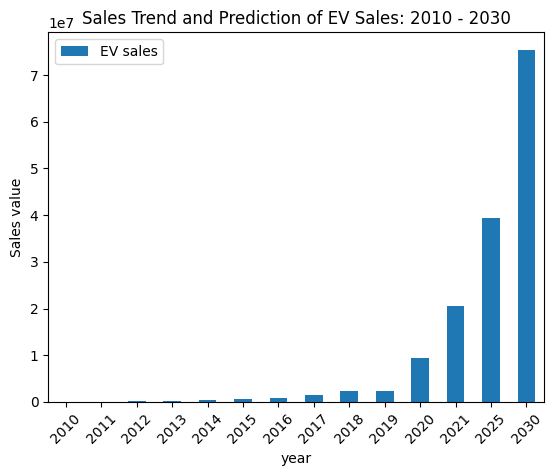

In [ ]:
parameter_year = sales.groupby(['year', 'parameter'])['value'].sum()  # Grouping the sales DataFrame by 'year' and 'parameter', then summing up the 'value' column
parameter_year.to_csv('parameter_year.csv')                           # Exporting the grouped data to a CSV file named 'parameter_year.csv'

parameter_year = pd.read_csv('parameter_year.csv')                    # Reading the exported CSV file into a new DataFrame named parameter_year
parameter_year = parameter_year.pivot_table(parameter_year, index=['year'], columns=['parameter'], fill_value=0, aggfunc=np.sum)  # Creating a pivot table to reshape the DataFrame
parameter_year.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])            # Plotting a stacked bar chart of the parameter_year DataFrame
plt.legend(['EV sales'])                                              # Adding a legend to the plot
plt.xticks(rotation=45)                                               # Rotating the x-axis labels for better readability
plt.ylabel('Sales value')                                             # Adding a label to the y-axis
plt.title('Sales Trend and Prediction of EV Sales: 2010 - 2030')      # Adding a title to the plot
plt.show()                                                            # Displaying the plot

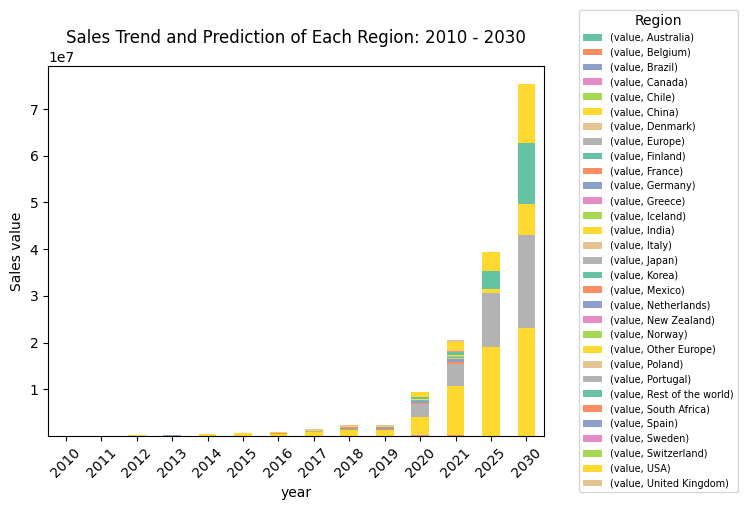

In [ ]:
region_year = sales.groupby(['year', 'region'])['value'].sum()  # Grouping the sales DataFrame by 'year' and 'region', then summing up the 'value' column
region_year.to_csv('region_year.csv')                           # Exporting the grouped data to a CSV file named 'region_year.csv'

region_year = pd.read_csv('region_year.csv')                    # Reading the exported CSV file into a new DataFrame named region_year
region_year = region_year.pivot_table(region_year, index=['year'], columns=['region'], fill_value=0, aggfunc=np.sum)  # Creating a pivot table to reshape the DataFrame
#colors = sns.color_palette("Set2", n_colors=len(region_year.columns))
ax = region_year.plot(kind='bar', stacked=True, color=sns.color_palette("Set2", n_colors=len(region_year.columns)))                 # Plotting a stacked bar chart of the region_year DataFrame
sns.move_legend(ax, loc='center right', bbox_to_anchor=(1.4, 0.5), title='Region', fontsize=7)  # Moving the legend to a specified position
plt.xticks(rotation=45)                                         # Rotating the x-axis labels for better readability
plt.ylabel('Sales value')                                       # Adding a label to the y-axis
plt.title('Sales Trend and Prediction of Each Region: 2010 - 2030')  # Adding a title to the plot
plt.show()                                                      # Displaying the plot

In [ ]:
sales['category'].unique()  # Getting an array of unique values in the 'category' column of the DataFrame sales

array(['Historical', 'Projection-STEPS', 'Projection-APS'], dtype=object)

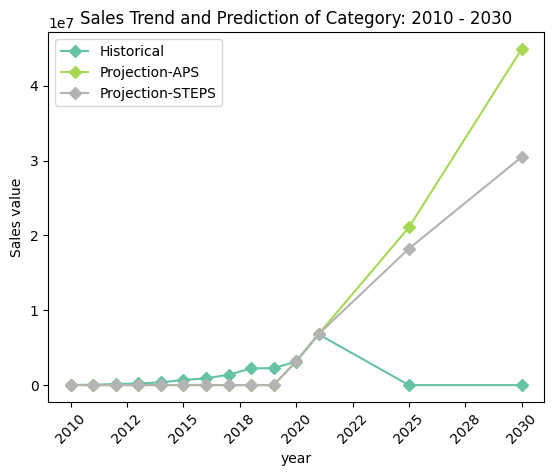

In [ ]:
category_year = sales.groupby(['year', 'category'])['value'].sum()  # Grouping the sales DataFrame by 'year' and 'category', then summing up the 'value' column
category_year.to_csv('category_year.csv')                           # Exporting the grouped data to a CSV file named 'category_year.csv'

category_year = pd.read_csv('category_year.csv')                    # Reading the exported CSV file into a new DataFrame named category_year
category_year = category_year.pivot_table(category_year, index=['year'], columns=['category'], fill_value=0, aggfunc=np.sum)  # Creating a pivot table to reshape the DataFrame
ax1 = category_year.plot(kind='line', cmap='Set2', marker='D')      # Plotting a line chart of the category_year DataFrame
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))       # Formatting the x-axis tick labels to display integers
plt.legend(['Historical', 'Projection-APS', 'Projection-STEPS'])    # Adding a legend to the plot
plt.xticks(rotation=45)                                             # Rotating the x-axis labels for better readability
plt.ylabel('Sales value')                                           # Adding a label to the y-axis
plt.title('Sales Trend and Prediction of Category: 2010 - 2030')    # Adding a title to the plot
plt.show()                                                          # Displaying the plot

In [ ]:
sales['mode'].unique()  # Getting an array of unique values in the 'mode' column of the DataFrame sales

array(['Cars', 'Vans', 'Trucks', 'Buses'], dtype=object)

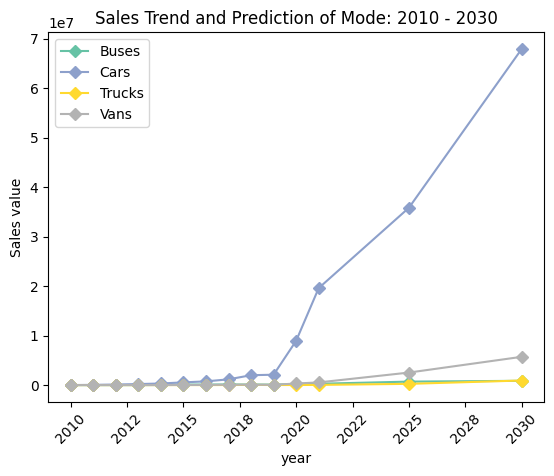

In [ ]:
mode_year = sales.groupby(['year', 'mode'])['value'].sum()    # Grouping the sales DataFrame by 'year' and 'mode', then summing up the 'value' column
mode_year.to_csv('mode_year.csv')                             # Exporting the grouped data to a CSV file named 'mode_year.csv'

mode_year = pd.read_csv('mode_year.csv')                      # Reading the exported CSV file into a new DataFrame named mode_year
mode_year = mode_year.pivot_table(mode_year, index=['year'], columns=['mode'], fill_value=0, aggfunc=np.sum)  # Creating a pivot table to reshape the DataFrame
ax2 = mode_year.plot(kind='line', cmap='Set2', marker='D')    # Plotting a line chart of the mode_year DataFrame
ax2.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f')) # Formatting the x-axis tick labels to display integers
plt.legend(['Buses', 'Cars', 'Trucks', 'Vans'])               # Adding a legend to the plot
plt.xticks(rotation=45)                                       # Rotating the x-axis labels for better readability
plt.ylabel('Sales value')                                     # Adding a label to the y-axis
plt.title('Sales Trend and Prediction of Mode: 2010 - 2030')  # Adding a title to the plot
plt.show()                                                    # Displaying the plot


In [ ]:
sales['powertrain'].unique()  # Getting an array of unique values in the 'powertrain' column of the DataFrame sales

array(['BEV', 'PHEV'], dtype=object)

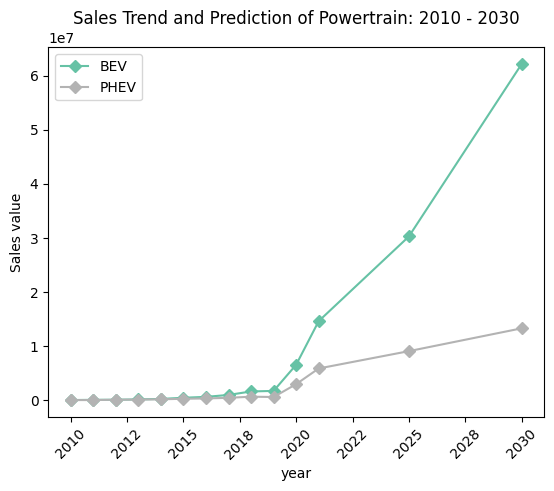

In [ ]:
powertrain_year = sales.groupby(['year', 'powertrain'])['value'].sum()   # Grouping the sales DataFrame by 'year' and 'powertrain', then summing up the 'value' column
powertrain_year.to_csv('powertrain_year.csv')                            # Exporting the grouped data to a CSV file named 'powertrain_year.csv'

powertrain_year = pd.read_csv('powertrain_year.csv')                     # Reading the exported CSV file into a new DataFrame named powertrain_year
powertrain_year = powertrain_year.pivot_table(powertrain_year, index=['year'], columns=['powertrain'], fill_value=0, aggfunc=np.sum)  # Creating a pivot table to reshape the DataFrame
ax3 = powertrain_year.plot(kind='line', cmap='Set2', marker='D')         # Plotting a line chart of the powertrain_year DataFrame
ax3.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))            # Formatting the x-axis tick labels to display integers
plt.legend(['BEV', 'PHEV'])                                              # Adding a legend to the plot
plt.xticks(rotation=45)                                                  # Rotating the x-axis labels for better readability
plt.ylabel('Sales value')                                                # Adding a label to the y-axis
plt.title('Sales Trend and Prediction of Powertrain: 2010 - 2030')       # Adding a title to the plot
plt.show()                                                               # Displaying the plot


# Conclusion:


1. Sales of electric vehicles have increased dramatically overall, particularly since FY 2020.
2. China leads the world in EV sales, with Japan and India following closely behind.
3. India is also seeing a rise in EV sales.
4. From 2010 to 2030, sales patterns and projections show that the adoption of EVs will rise steadily in nations including Belgium, Greece, China, the United States, and India.
5. The most popular EV vehicle category is cars, with the fastest increase coming from EV vans, EV buses, and EV trucks.
6. Comparing battery electric cars (BEVs) to plug-in hybrid electric vehicles (PHEVs), BEV growth has been phenomenal.
7. This result will be a good prediction unless affected by external phenomenon influencing the sales of EVs.
